# Linear algebra

Author: Marios Koulakis

## Part 2: Linear transformations and matrices

**Note:** Throughout the text we assume being in finite dimensional spaces over $\mathbb{R}$ equipped with the Euclidian inner product.

In [58]:
%run ./utils.py

In [59]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive
import ipywidgets as widgets

### Linear transformations
A linear transformation is a function $f: V \rightarrow U$ from a linear space $V$ to a linear space $U$ which preserves the linear space structure i.e.:
- $f(\mathbf{v} + \mathbf{u}) = f(\mathbf{v}) + f(\mathbf{u})$
- $f(a\ \mathbf{v}) = a\ f(\mathbf{v})$

for every $\mathbf{v} \in V$ and $a \in \mathbb{R}$.

### From linear trasformations to matrices
We mentioned before that the main tool in linear spaces is the Cartesian coordinates representation of vectors. Actually in every coding example the vectors made sense only through those representations!

It makes sense to look for a similar representation for the linear embeddings. To do that we have to study what happens when we map the vectors from an orthonormal base of $V$ to an orthonormal base of $U$.

For simplicity let's assume that 
- $V = U = \mathbb{R}^2$ 
- $\mathbf{e_1} = (1, 0), \mathbf{e_2} = (0, 1)$
- $f: V \rightarrow U$ is a linear transform

Then there are vectors $\mathbf{u_1}, \mathbf{u_2} \in U$ such that 
- $f(\mathbf{e_1}) = \mathbf{u_1}$
- $f(\mathbf{e_2}) = \mathbf{u_2}$

If we expand $\mathbf{u_1}, \mathbf{u_2}$ with their basis representations we get 
- $\mathbf{u_1} = a_{11} \mathbf{e_1} + a_{12} \mathbf{e_2}$ and $\mathbf{u_1} = a_{21} \mathbf{e_1} + a_{22} \mathbf{e_2}$ 

for some coordinates $a_{11}, a_{12}, a_{21}, a_{22} \in \mathbb{R}$.

This means that:
- $f(\mathbf{e_1}) = a_{11} \mathbf{e_1} + a_{12} \mathbf{e_2}$
- $f(\mathbf{e_2}) = a_{21} \mathbf{e_1} + a_{22} \mathbf{e_2}$

Provided that any vector can be represented on the basis $\mathbf{e_1}, \mathbf{e_2}$ with its coordinates, the information in $a_{11}, a_{12}, a_{21}, a_{22}$ is enough to describe the linear transform $f$. Because those coefficients are assigned per element of the basis, we add another dimension in the notation of the representation and get a matrix:

$A = \begin{bmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{bmatrix}$

Now given any $\mathbf{v} \in V$ and its representation $x_1 \mathbf{e_1} + x_2 \mathbf{e_2}$, we can compute its image:

$\begin{align*} 
f(\mathbf{v}) & = f(x_1 \mathbf{e_1} + x_2 \mathbf{e_2})\\ 
& = x_1 f(\mathbf{e_1}) + x_2 f(\mathbf{e_2})\\
& = x_1 a_{11} \mathbf{e_1} + x_1 a_{12} \mathbf{e_2} + x_2 a_{21} \mathbf{e_1} + x_2 a_{22} \mathbf{e_2}\\
& = (x_1 a_{11} + x_2 a_{21})\ \mathbf{e_1} + (x_1 a_{12} + x_2 a_{22})\ \mathbf{e_2}
\end{align*}$

If we go on and define the multiplication of a matrix with an array as:

$\begin{bmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
    x_1\\
    x_2 
\end{bmatrix}
=
\begin{bmatrix}
    x_1 a_{11} + x_2 a_{21}\\
    x_1 a_{12} + x_2 a_{22} 
\end{bmatrix}$

then we finally have a useful way of computing $f$:

$f: (x_1, x_2) \mapsto 
\begin{bmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
    x_1\\
    x_2
\end{bmatrix}$

or, in short,

$f: \mathbf{v} \mapsto A \mathbf{v}$

In numpy: `np.matmul(A, v)`

### Some common linear transformations
We first focus on linear transformations $f: \mathbb{R} \mapsto \mathbb{R}$ which preserve dimensionality. To illustrate the transforms, we fix three vectors and the triangle they form and observe how those objects look like after applying the transformation.  

#### Fixed vectors

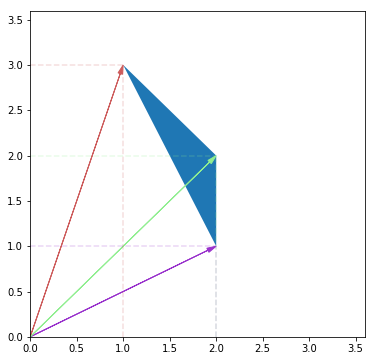

In [60]:
vectors = [np.array([1, 3]), np.array([2, 1]), np.array([2, 2])]
colors = ['indianred', 'darkorchid', 'lightgreen']

plt.figure(figsize=(6, 6))
plot_vectors_and_polygon(vectors, colors)
plt.show()

#### Scaling by constant $a$
$\begin{bmatrix}
    a & 0\\
    0 & a
\end{bmatrix}$

where $a \in \mathbb{R}$.

In [61]:
def scale_by_constant(a):
    scaling_matrix = np.array([
        [a, 0],
        [0, a]
    ])

    transformed_vectors = [np.matmul(scaling_matrix, vector) for vector in vectors]

    plt.figure(figsize=(6, 6))
    plot_vectors_and_polygon(vectors, colors)
    plt.annotate('original', xy=vectors[2] + [.1, .1])

    plot_vectors_and_polygon(transformed_vectors, colors)
    plt.annotate('scaled', xy=transformed_vectors[2] + [.1, .1])

    plt.show()

In [62]:
interactive(
    scale_by_constant,
    a=widgets.FloatSlider(min=-10, max=10, step=0.3, value=2))

interactive(children=(FloatSlider(value=2.0, description='a', max=10.0, min=-10.0, step=0.3), Output()), _dom_…

#### Scaling only along one axis
$\begin{bmatrix}
    1 & 0\\
    0 & a
\end{bmatrix}$

where $a \in \mathbb{R}$.

In [63]:
def scale_along_axis(a):
    scaling_matrix = np.array([
        [1, 0],
        [0, a]
    ])

    transformed_vectors = [np.matmul(scaling_matrix, vector) for vector in vectors]

    plt.figure(figsize=(6, 6))
    plot_vectors_and_polygon(vectors, colors)
    plt.annotate('original', xy=vectors[2] + [.1, .1])

    plot_vectors_and_polygon(transformed_vectors, colors)
    plt.annotate('scaled', xy=transformed_vectors[2] + [.1, .1])

    plt.show()

In [64]:
interactive(
    scale_along_axis,
    a=widgets.FloatSlider(min=-10, max=10, step=0.3, value=3))

interactive(children=(FloatSlider(value=3.0, description='a', max=10.0, min=-10.0, step=0.3), Output()), _dom_…

#### Rotation counter-clockwise by angle
$\begin{bmatrix}
    \cos\theta & -\sin\theta\\
    \sin\theta & \cos\theta
\end{bmatrix}$

where $\theta \in [0, 2\pi)$.

In [65]:
def rotation(theta):
    rotation_matrix = np.array([
        [np.cos(theta), - np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

    transformed_vectors = [np.matmul(rotation_matrix, vector) for vector in vectors]

    plt.figure(figsize=(6, 6))
    plot_vectors_and_polygon(vectors, colors)
    plt.annotate('original', xy=vectors[2] + [.1, .1])

    plot_vectors_and_polygon(transformed_vectors, colors)
    plt.annotate('rotated by: {:.2f} pi'.format(theta / np.pi), xy=transformed_vectors[2] + [-.3, .2])

    plt.show()

In [66]:
interactive(
    rotation,
    theta=widgets.FloatSlider(min=-np.pi,max=np.pi, step=np.pi/100, value=np.pi/2))

interactive(children=(FloatSlider(value=1.5707963267948966, description='theta', max=3.141592653589793, min=-3…

#### Reflection agains the horizontal axis
$\begin{bmatrix}
    1 & 0\\
    0 & -1
\end{bmatrix}$

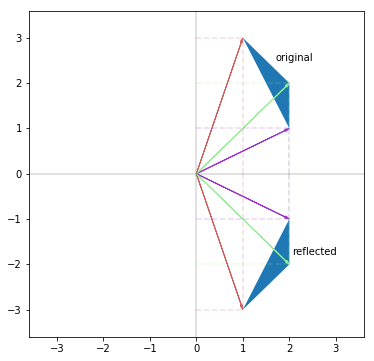

In [67]:
reflection_matrix = np.array([
    [1, 0],
    [0, -1]
])

transformed_vectors = [np.matmul(reflection_matrix, vector) for vector in vectors]

plt.figure(figsize=(6, 6))
plot_vectors_and_polygon(vectors, colors)
plt.annotate('original', xy=vectors[2] + [-.3, .5])

plot_vectors_and_polygon(transformed_vectors, colors)
plt.annotate('reflected', xy=transformed_vectors[2] + [.05, .2])

plt.show()

#### Random transformations
Transformations can be more complex than the ones described above. The complexity comes from the relative change of direction between the basis vectors. The examples below are transformations more invasive than the ones above.

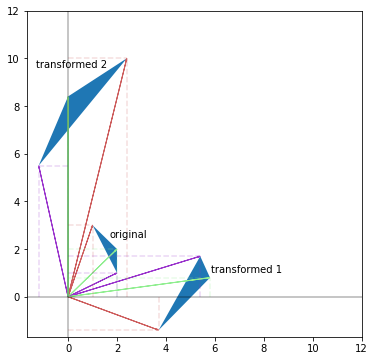

In [68]:
any_matrix_1 = np.array([
    [2.5, 0.4],
    [1.3, -0.9]
])

any_matrix_2 = np.array([
    [-1.2, 1.2],
    [1.3, 2.9]
])

transformed_vectors_1 = [np.matmul(any_matrix_1, vector) for vector in vectors]
transformed_vectors_2 = [np.matmul(any_matrix_2, vector) for vector in vectors]

plt.figure(figsize=(6, 6))
plot_vectors_and_polygon(vectors, colors)
plt.annotate('original', xy=vectors[2] + [-.3, .5])

plot_vectors_and_polygon(transformed_vectors_1, colors)
plt.annotate('transformed 1', xy=transformed_vectors_1[2] + [.05, .2])

plot_vectors_and_polygon(transformed_vectors_2, colors)
plt.annotate('transformed 2', xy=transformed_vectors_2[2] + [-1.3, 1.2])

plt.show()

In [69]:
def random_transform(a11, a12, a21, a22):
    any_matrix_1 = np.array([
        [a11, a12],
        [a21, a22]
    ])

    transformed_vectors = [np.matmul(any_matrix_1, vector) for vector in vectors]

    plt.figure(figsize=(6, 6))
    plot_vectors_and_polygon(vectors, colors)
    plt.annotate('original', xy=vectors[2] + [-.3, .5])

    plot_vectors_and_polygon(transformed_vectors, colors)
    plt.annotate('transformed', xy=transformed_vectors[2] + [.05, .2])

    plt.show()

In [70]:
interactive(
    random_transform,
    a11=widgets.FloatSlider(min=-10,max=10,step=0.3,value=2.5),
    a12=widgets.FloatSlider(min=-10,max=10,step=0.3,value=0.4),
    a21=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1.4),
    a22=widgets.FloatSlider(min=-10,max=10,step=0.3,value=-0.9))

interactive(children=(FloatSlider(value=2.5, description='a11', max=10.0, min=-10.0, step=0.3), FloatSlider(va…

### Linear transformations compressing dimensionality
Up to now we considered transforms which scaled and rotated our vectors but always preserved the 2 dimensions of the vector space. This is not always the case.

#### From 2 dimensions to 1: Projection to the x-axis
$\begin{bmatrix}
    0 & 0\\
    0 & 1
\end{bmatrix}$

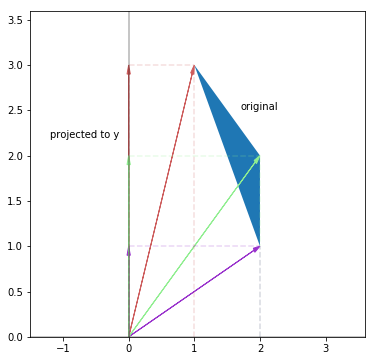

In [71]:

projection_x_matrix = np.array([
    [0, 0],
    [0, 1]
])

transformed_vectors = [np.matmul(projection_x_matrix, vector) for vector in vectors]

plt.figure(figsize=(6, 6))
plt.xlim((-1.5, 3))
plot_vectors_and_polygon(vectors, colors)
plt.annotate('original', xy=vectors[2] + [-.3, .5])

plot_vectors_and_polygon(transformed_vectors, colors)
plt.annotate('projected to y', xy=transformed_vectors[2] + [-1.2, .2])

plt.show()

#### From 2 dimensions to 1: Projection to the y-axis
$\begin{bmatrix}
    1 & 0\\
    0 & 0
\end{bmatrix}$

In [72]:
def project_to_y_axis(a1, a2, a3): 
    projection_y_matrix = np.array([
        [1, 0],
        [0, 0]
    ])
    
    original_vectors = (np.array([a1, a2, a3]) * np.array(vectors).T).T
    
    transformed_vectors = [np.matmul(projection_y_matrix, vector) for vector in original_vectors]

    plt.figure(figsize=(6, 6))
    plt.ylim((-0.5, 3.5))
    plot_vectors_and_polygon(original_vectors, colors)
    plt.annotate('original', xy=original_vectors[2] + [-.3, .5])

    plot_vectors_and_polygon(transformed_vectors, colors)
    plt.annotate('projected to x', xy=transformed_vectors[2] + [-0.9, .2])

    plt.show()

In [73]:
interactive(
    project_to_y_axis,
    a1=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    a2=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    a3=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1))

interactive(children=(FloatSlider(value=1.0, description='a1', max=10.0, min=-10.0, step=0.3), FloatSlider(val…

#### From 3 dimensions to 2: Projection to the xy-plane
$\begin{bmatrix}
    1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 0
\end{bmatrix}$

In [74]:
colors_3D = ['indianred', 'seagreen', 'darkorchid', 'gold']
vectors_3D = np.array([[0, 1, 1], [2, 0, 1], [3, 3, 4], [1, 0.2, 2]])
fontsize_3D = 16

projection_xy = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

def project_to_xy_plane(a1, a2, a3, a4):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')

    original_vectors = (np.array([a1, a2, a3, a4]) * np.array(vectors_3D).T).T
    
    transformed_vectors_3D = [np.matmul(projection_xy, vector) for vector in original_vectors] 

    plot_3D_vectors_and_polyhedron(ax, original_vectors, colors_3D)
    
    ax.text(*(original_vectors[2] + 0.1), 'original', fontsize=fontsize_3D)

    plot_3D_vectors_and_polyhedron(ax, transformed_vectors_3D, colors_3D)
    ax.text(*(transformed_vectors_3D[2] + 0.1), 'projected to xy', fontsize=fontsize_3D)

    plt.show()

In [75]:
interactive(
    project_to_xy_plane,
    a1=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    a2=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    a3=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    a4=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1))

interactive(children=(FloatSlider(value=1.0, description='a1', max=10.0, min=-10.0, step=0.3), FloatSlider(val…

#### From 3 dimensions to 1: Projection to the diagonal line
$\begin{bmatrix}
    1 & 0 & 0\\
    1 & 0 & 0\\
    0 & 0 & 0
\end{bmatrix}$

In [76]:
projection_xy = np.array([
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 0]
])

def project_to_the_diagonal(a1, a2, a3, a4):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')

    original_vectors = (np.array([a1, a2, a3, a4]) * np.array(vectors_3D).T).T

    transformed_vectors_3D = [np.matmul(projection_xy, vector) for vector in original_vectors] 

    plot_3D_vectors_and_polyhedron(ax, original_vectors, colors_3D)
    
    ax.text(*(original_vectors[2] + 0.1), 'original', fontsize=fontsize_3D)

    plot_3D_vectors_and_polyhedron(ax, transformed_vectors_3D, colors_3D)
    ax.text(
        *(transformed_vectors_3D[2] + 0.1), 
        'projected to the xy\n       diagonal', 
        fontsize=fontsize_3D)

    plt.show()

In [77]:
interactive(
    project_to_the_diagonal,
    a1=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    a2=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    a3=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    a4=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1))

interactive(children=(FloatSlider(value=1.0, description='a1', max=10.0, min=-10.0, step=0.3), FloatSlider(val…

### Linear transformations embedding into higher dimensionality
Up to now we have only seen endomorphisms of linear spaces, i.e. trasformations from one space to itself. Though they capture a large portion of useful transformations, one can transform any linear space to another one. In the case of finite dimensional spaces, the transformation $f: V \mapsto U$ can be represented by a matrix with $n$ rows and $m$ columns, where $n$ is the dimension of $V$ and $m$ the dimension of $U$.

Linear transformations which embed a vector space to another vector space with higher dimensionality provide a useful way of defining lines, planes and hyperplanes ($n$-dimensional plane in an $m$ dimensional space, where $m > n$).

#### Line in the plane
$\begin{bmatrix}
    1\\
    0.5
\end{bmatrix}$

In this case we have a transform $f: \mathbb{R} \rightarrow \mathbb{R}^2$ where $f: x \mapsto [x, 0.5 x]$.

In [78]:
def line_in_the_plane(x, y):
    # we embed several 1D vectors to generate the line
    vectors_1D = [np.array([i]) for i in [-2, -1, 1, 2]]

    line = np.array([
        [x], 
        [y]
    ])

    transformed_vectors = [np.matmul(line, vector) for vector in vectors_1D]

    # Plot vectors on line
    plt.figure(figsize=(6, 6))
    plot_vectors_and_polygon(transformed_vectors)

    plt.show()

In [79]:
interactive(
    line_in_the_plane,
    x=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    y=widgets.FloatSlider(min=-10,max=10,step=0.3,value=0.5))

interactive(children=(FloatSlider(value=1.0, description='x', max=10.0, min=-10.0, step=0.3), FloatSlider(valu…

#### Line in the 3D space
$\begin{bmatrix}
    1\\
    0.5\\
    2
\end{bmatrix}$

In this case we have a transform $f: \mathbb{R} \rightarrow \mathbb{R}^3$ where $f: x \mapsto [x, 0.5 x, 2 x]$.

In [80]:
def line_in_3D_space(x, y, z):
    # we embed several 1D vectors to generate the line
    vectors_1D = [np.array([i]) for i in [1, 2, 3, 4]]

    line = np.array([
        [x], 
        [y],
        [z]
    ])

    transformed_vectors = [np.matmul(line, vector) for vector in vectors_1D]

    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')

    plot_3D_vectors_and_polyhedron(ax, transformed_vectors)

    ax.text(
        *(transformed_vectors[3] + 0.1), 
        'line in the 3D space', 
        fontsize=fontsize_3D)
    plt.show()

In [81]:
interactive(
    line_in_3D_space,
    x=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    y=widgets.FloatSlider(min=-10,max=10,step=0.3,value=0.5),
    z=widgets.FloatSlider(min=-10,max=10,step=0.3,value=2))

interactive(children=(FloatSlider(value=1.0, description='x', max=10.0, min=-10.0, step=0.3), FloatSlider(valu…

#### Plane in the 3D space
$\begin{bmatrix}
    1 & 2\\
    0.5 & 3\\
    2 & 1
\end{bmatrix}$

In this case we have a transform $f: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ where $f: [x, y] \mapsto [x + 2 y, 0.5 x + 3 y, 2 x + y]$.

In [82]:
def plane_in_the_3D_space(x1, y1, z1, x2, y2, z2):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')

    vectors_2D = [np.array([i, j]) for i in [0.01, 1, 2, 3] for j in [0.01, 1, 2, 3] ]

    plane = np.array([
        [x1, x2],
        [y1, y2],
        [z1, z2]
    ])

    transformed_vectors_3D = [np.matmul(plane, vector) for vector in vectors_2D] 

    plot_3D_vectors_and_polyhedron(ax, transformed_vectors_3D)
    ax.text(
        *(transformed_vectors_3D[15] + 0.1), 
        'plane in 3D\n     space', 
        fontsize=fontsize_3D)

    plt.show()

In [83]:
interactive(
    plane_in_the_3D_space,
    x1=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1),
    y1=widgets.FloatSlider(min=-10,max=10,step=0.3,value=0.5),
    z1=widgets.FloatSlider(min=-10,max=10,step=0.3,value=2),
    x2=widgets.FloatSlider(min=-10,max=10,step=0.3,value=2),
    y2=widgets.FloatSlider(min=-10,max=10,step=0.3,value=3),
    z2=widgets.FloatSlider(min=-10,max=10,step=0.3,value=1))

interactive(children=(FloatSlider(value=1.0, description='x1', max=10.0, min=-10.0, step=0.3), FloatSlider(val…